<h3>Цель анализа</h3>

Понять ключевые факторы, влияющие на цену недвижимости в Мельбурне, и выявить закономерности рынка — какие районы, типы домов, площади и другие параметры определяют стоимость.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



<h3>Data discovery</h3>

In [2]:
df = pd.read_csv('data/MelbourneHousing.csv')

In [3]:
df.shape

(34857, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


<h3>Смотрю количество пропусков</h3>
Здесь обращаю внимание на большое количество пропусков в столбце price <br>
В дальнейшем, для достоверного оценивания факторов, влияющих на цену с ними придётся иметь дело

In [7]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  13
Number of Categorical features:  8


In [8]:
numerical_feats

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [9]:
categorical_feats

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

<Axes: >

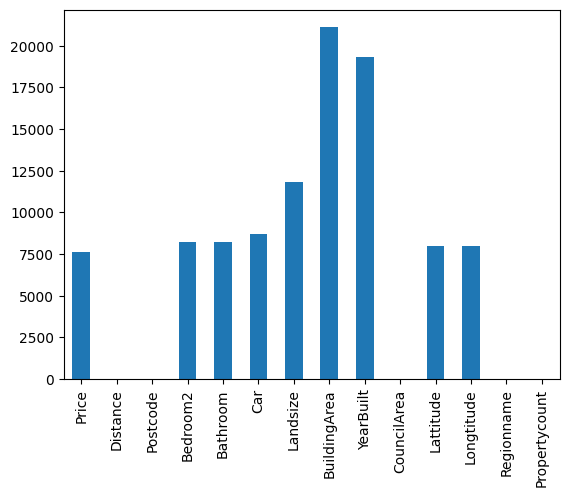

In [10]:
missing= df.isnull().sum() 
missing = missing[missing > 0]
missing.plot.bar() 

In [11]:
missing

Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: >

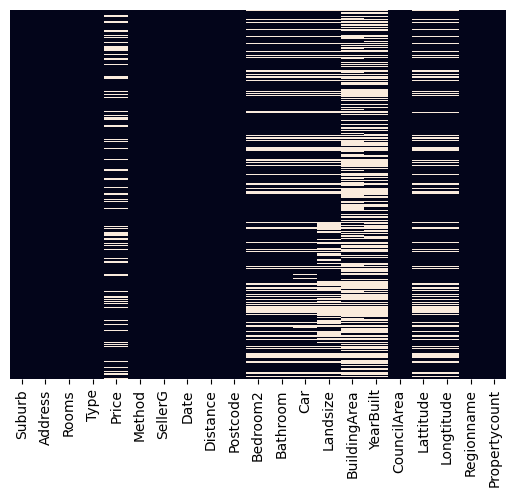

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
df['Car'].mean()

np.float64(1.7288453442535114)

In [14]:
df['Car']= df['Car'].replace(np.nan,df['Car'].mean())

In [15]:
df['BuildingArea']=df['BuildingArea'].replace(np.nan,df['BuildingArea'].mean())

In [16]:
df['YearBuilt']=df['YearBuilt'].replace(np.nan,df['YearBuilt'].mean())

<h4>Стоит обратить внимание на то что у нас имеется 7610 пропусков в столбце price</h4>

Это слишком много, чтобы просто удалить такие строки, потому что мы потеряем много данных и исказим анализ.

<h4>Идея моего решения такова</h4>
Заполнить пропуски разумными значениями. Я хочу, чтобы заполнение отражало реальную рыночную ситуацию, а не просто вставляло среднее по всему датасету

<h4>Для этого я использовал следующий метод</h4>

1. Сначала группируем данные по району (suburb) и типу недвижимости (type). Потому что недвижимость одного типа в одном районе примерно одинаково оценивается

2. В каждой группе считаем медиану цены — медиана устойчива к выбросам, в отличие от среднего

3. Для каждой строки с пропуском берём соответствующую медиану из группы

In [17]:
# Вычисляем медиану цены для каждой группы suburb + type
median_prices = df.groupby(['Suburb', 'Type'])['Price'].median()

# Функция для заполнения пропусков
def fill_price(row):
    if pd.isna(row['Price']):
        return median_prices.loc[row['Suburb'], row['Type']]
    return row['Price']

# Применяем функцию
df['Price'] = df.apply(fill_price, axis=1)

# Проверим, остались ли пропуски
df['Price'].isna().sum()

np.int64(27)

Вижу, что осталось 27 пропусков, заполню их средним значением

In [18]:
df['Price']=df['Price'].replace(np.nan,df['Price'].mean())

In [19]:
df['Bedroom2']=df['Bedroom2'].replace(np.nan,df['Bedroom2'].mean())

In [20]:
df['Bathroom']=df['Bathroom'].replace(np.nan,df['Bathroom'].mean())

In [21]:
df['Landsize']=df['Landsize'].replace(np.nan,df['Landsize'].mean())

In [22]:
df['Lattitude']=df['Lattitude'].replace(np.nan,df['Lattitude'].mean())

In [23]:
df['Longtitude']=df['Longtitude'].replace(np.nan,df['Longtitude'].mean())

In [24]:
df['Distance']=df['Distance'].replace(np.nan,df['Distance'].mean())

In [25]:
df['Postcode']=df['Postcode'].replace(np.nan,df['Postcode'].mean())

In [26]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    3
dtype: int64

In [27]:
ca=df.iloc[ : , :-1].values
ca

array([['Abbotsford', '68 Studley St', 2, ..., -37.8014, 144.9958,
        'Northern Metropolitan'],
       ['Abbotsford', '85 Turner St', 2, ..., -37.7996, 144.9984,
        'Northern Metropolitan'],
       ['Abbotsford', '25 Bloomburg St', 2, ..., -37.8079, 144.9934,
        'Northern Metropolitan'],
       ...,
       ['Yarraville', '147A Severn St', 2, ..., -37.82286, 144.87856,
        'Western Metropolitan'],
       ['Yarraville', '12/37 Stephen St', 3, ..., -37.81063429559912,
        145.00185113165432, 'Western Metropolitan'],
       ['Yarraville', '3 Tarrengower St', 2, ..., -37.8181, 144.89351,
        'Western Metropolitan']], shape=(34857, 20), dtype=object)

In [28]:
df = df.dropna(subset=['CouncilArea'])

In [29]:
df = df.dropna(subset=['Regionname'])

In [30]:
df['Propertycount']=df['Propertycount'].replace(np.nan,df['Propertycount'].mean())

In [31]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Полностью избавился от пропущенных значений

<Axes: >

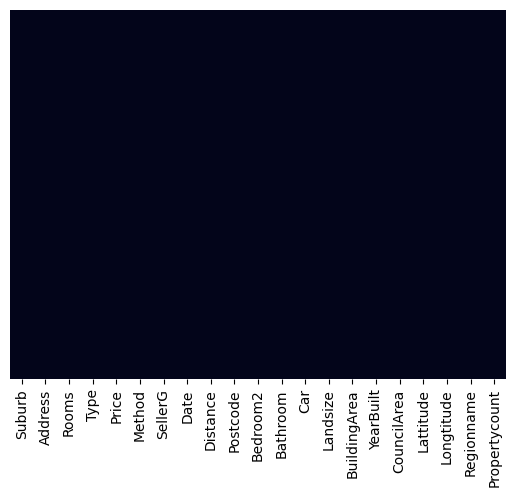

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<h3>Привел названия колонок в нижний регистр, для упрощения написания кода</h3>

In [33]:
df.columns = df.columns.str.lower()
df.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,68 Studley St,2,h,1200000.0,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,160.2564,1965.289885,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,160.2564,1965.289885,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0000,1900.000000,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,523500.0,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,160.2564,1965.289885,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0000,1900.000000,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<h3>Перевод столбца date в правильный формат datetime</h3>

In [34]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y", errors="coerce")
df['date'].info()

<class 'pandas.core.series.Series'>
Index: 34854 entries, 0 to 34856
Series name: date
Non-Null Count  Dtype         
--------------  -----         
34854 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 544.6 KB


In [35]:
df.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,68 Studley St,2,h,1200000.0,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,1.0,126.0,160.2564,1965.289885,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,160.2564,1965.289885,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0000,1900.000000,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,523500.0,VB,Rounds,2016-02-04,2.5,3067.0,...,2.0,1.0,0.0,160.2564,1965.289885,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0000,1900.000000,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<h2>Exploratory data analysis(Исследовательский анализ данных)</h2>

<h3>Здесь я хочу посмотреть на: </h3>
    
1. Расределение типов недвижимости
2. Количество недвижимости по регионам
3. Топ 20 районов по кол-ву недвижимости

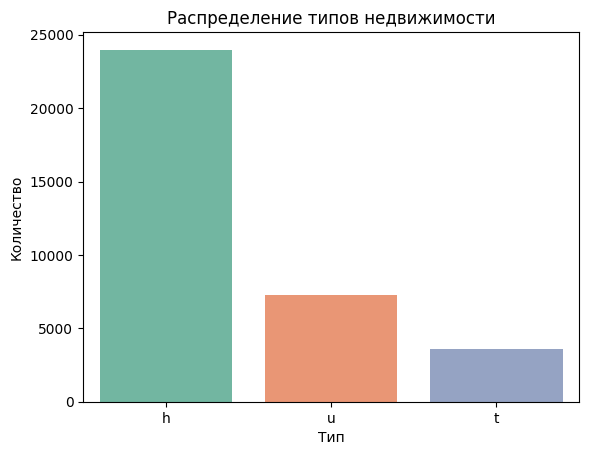

In [36]:
sns.countplot(x = 'type', data = df, hue = 'type', palette = 'Set2', legend = False)
plt.title('Распределение типов недвижимости')
plt.xlabel('Тип')
plt.ylabel('Количество')
plt.show()


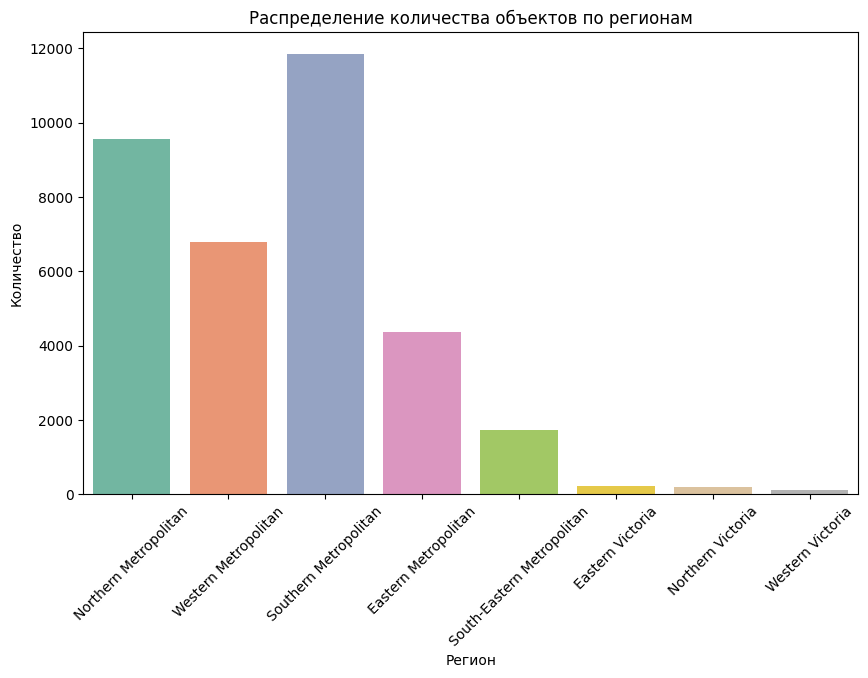

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'regionname', data = df, palette = 'Set2')
plt.title('Распределение количества объектов по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

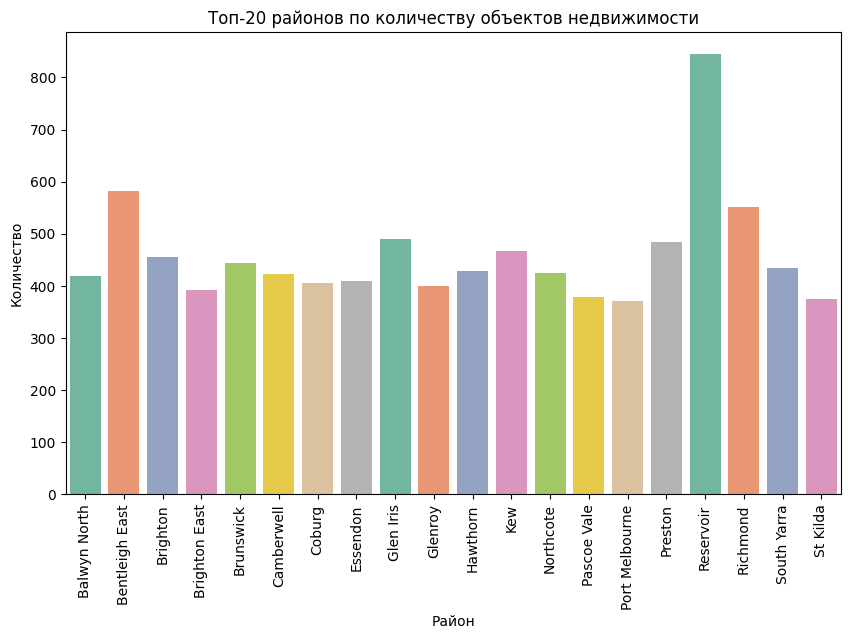

In [38]:
top_suburb = df['suburb'].value_counts().nlargest(20).index
plt.figure(figsize = (10,6))
sns.countplot(x = 'suburb', data = df[df['suburb'].isin(top_suburb)], palette = 'Set2')
plt.title('Топ-20 районов по количеству объектов недвижимости')
plt.xlabel('Район')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

<h3>Распределение по регионам (regionname)</h3>

Что показывает график:
График показывает, как объекты недвижимости распределены по основным регионам города

Вывод:

Некоторые регионы явно доминируют по количеству объектов, что может указывать на высокую активность рынка

Регионы с малым числом объектов могут быть менее популярными или иметь ограниченное количество предложений

<h3>Распределение по типу недвижимости (type)</h3>

Что показывает график:
График демонстрирует, какие типы недвижимости (например, дом, таунхаус, квартира) представлены на рынке и в каком количестве

Вывод:

На рынке преобладают определённые типы недвижимости, что может влиять на ценовую политику и стратегию застройщиков

Редкие типы объектов встречаются значительно реже, их стоимость и спрос могут сильно отличаться

<h3>Топ-20 районов по количеству объектов (suburb)</h3>

Что показывает график:
График отображает, в каких районах сосредоточено наибольшее количество объектов, и показывает их долю в общем объёме предложений

Вывод:

Топ-20 районов составляют значительную часть рынка, но при этом оставшаяся часть пригородов также имеет вес, что указывает на распределённость рынка

In [39]:
df['suburb'].value_counts().nlargest(20).sum()

np.int64(9181)

<h3>Далее буду проводить анализ цен</h3>
Для этого я выделил несколько параметров, на которые
необходимо обратить внимание, это:

1. Средняя цена по всему городу
2. ТОП-10 самых дорогих районов
3. Средняя цена по типу жилья (Type)
4. Как цена зависит от количества комнат, расстояния от центра (Distance), площади (BuildingArea)

<h3>Средняя цена по городу</h3>

In [40]:
df['price'].mean()

np.float64(1078344.5536742972)

<h3>Нахожу среднюю стоимость самых дорогих районов</h3>

In [41]:
top10_suburbs = df.groupby('suburb')['price'].mean().sort_values(ascending=True).head(10)
print(top10_suburbs)

suburb
Kurunjang          379593.750000
Darley             380000.000000
Melton South       421980.468750
Bacchus Marsh      423000.000000
Melton             428679.487179
Melton West        439065.789474
Cranbourne East    440000.000000
Coolaroo           476000.000000
Diggers Rest       478000.000000
Meadow Heights     485635.593220
Name: price, dtype: float64


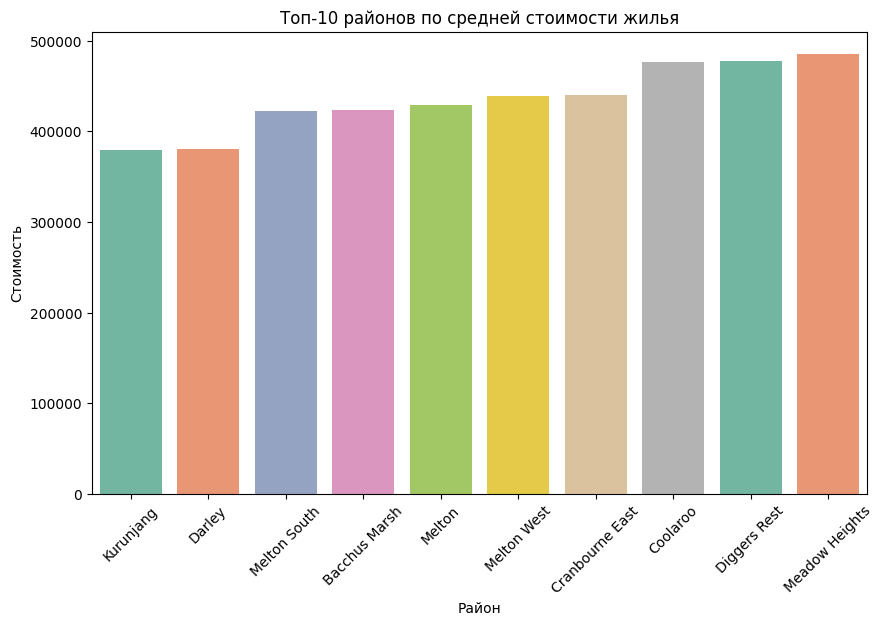

In [42]:
plt.figure(figsize = (10,6))
sns.barplot(data = top10_suburbs, palette = 'Set2')
plt.title('Топ-10 районов по средней стоимости жилья')
plt.xlabel('Район')
plt.ylabel('Стоимость')
plt.xticks(rotation=45)
plt.show()

<h3>Средняя цена по типу жилья</h3>

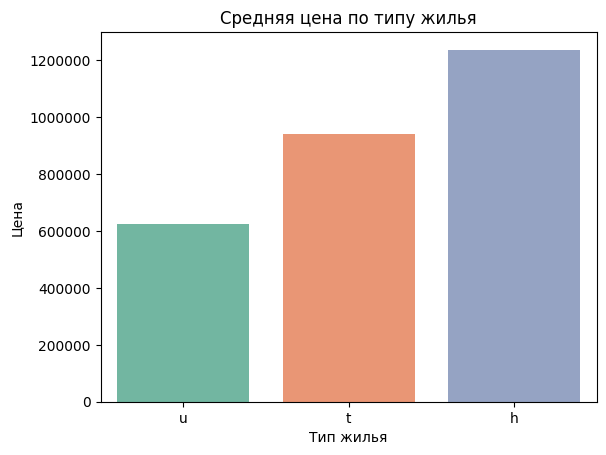

In [43]:
house_type_mean_price = df.groupby('type')['price'].mean().sort_values(ascending=True)
sns.barplot(data = house_type_mean_price, palette = 'Set2')
plt.title('Средняя цена по типу жилья')
plt.xlabel('Тип жилья')
plt.ylabel('Цена')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [44]:
house_type_mean_price.round()

type
u     623740.0
t     940558.0
h    1237243.0
Name: price, dtype: float64

<h3>Корреляционный анализ</h3>
Найти факторы, наиболее связанные с ценой corr()

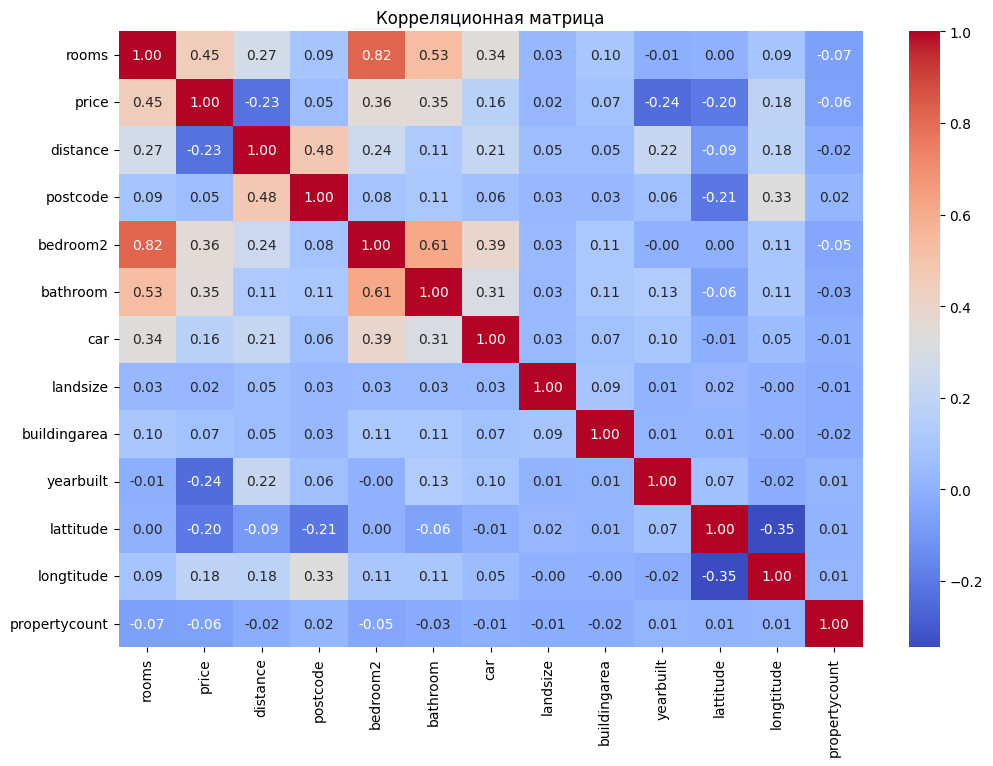

In [45]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()



<Axes: xlabel='bedroom2', ylabel='price'>

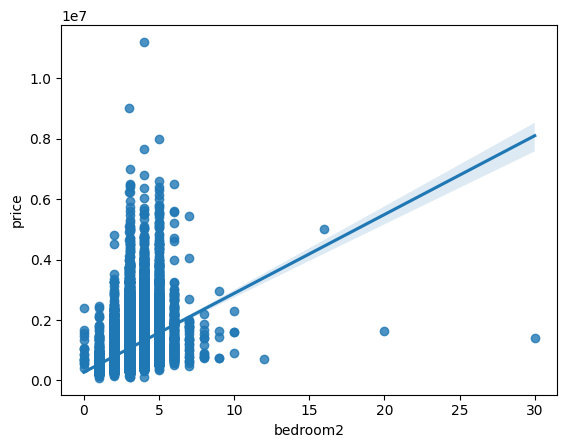

In [46]:
sns.regplot(x='bedroom2',y='price',data=df)


По графику можно заметить, что дома с количеством комнат от 2 до 5 имеют более высоку цену

<Axes: xlabel='rooms', ylabel='price'>

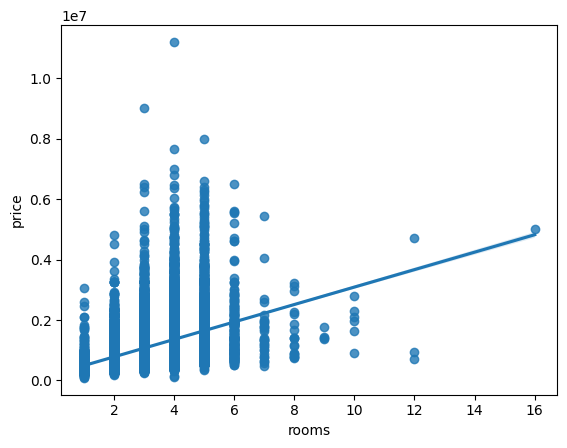

In [47]:
sns.regplot(x='rooms',y='price',data=df)


<Axes: xlabel='distance', ylabel='price'>

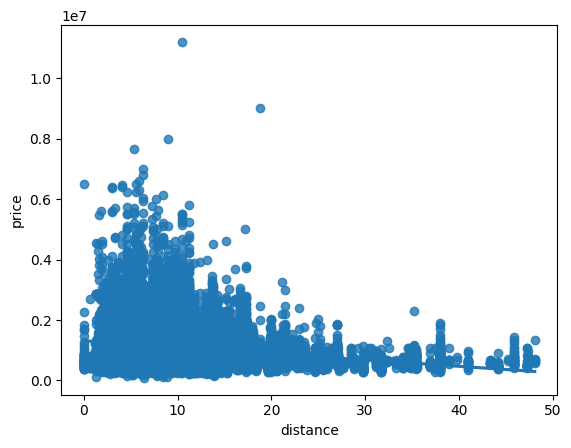

In [48]:
sns.regplot(x='distance',y='price',data=df)

Дома которые расположены ближе к центру, имеют более высокую цену

<Axes: xlabel='bathroom', ylabel='price'>

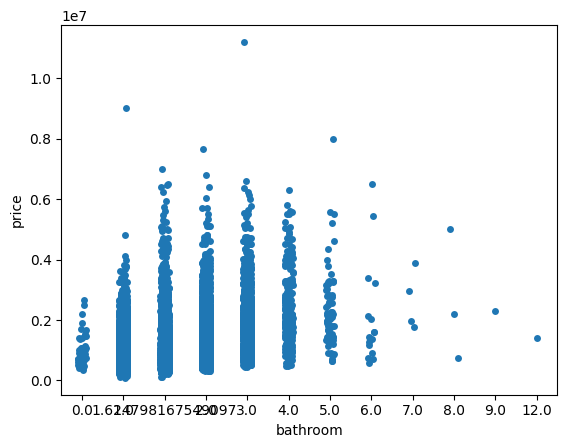

In [49]:
sns.stripplot(x='bathroom',y='price',data=df)


От 2 до 4 ванных комнат в доме стоят дорож

<Axes: xlabel='car', ylabel='price'>

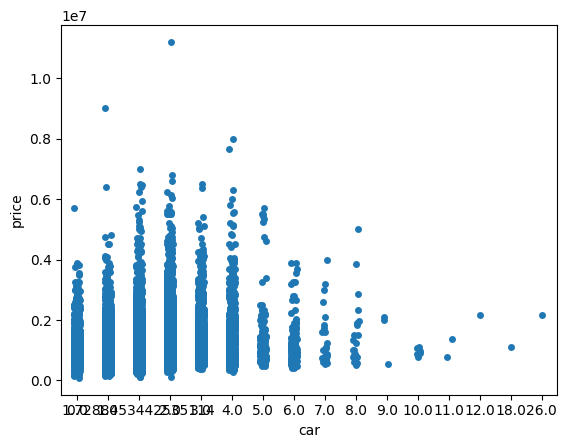

In [50]:
sns.stripplot(x='car',y='price',data=df)


Дома с вместимостью до 4 автомобилей пользуются более высоким спросом и стоят дороже

<Axes: xlabel='landsize', ylabel='price'>

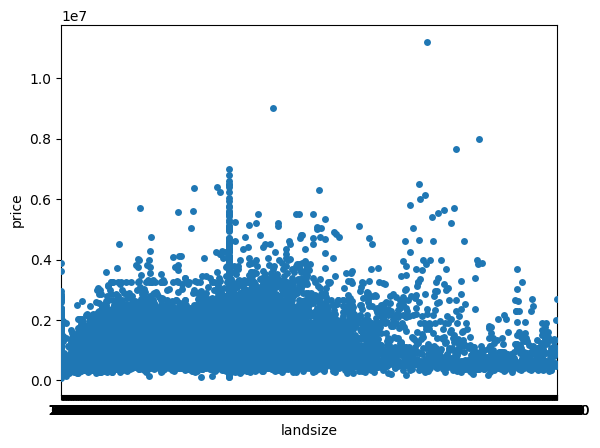

In [51]:
sns.stripplot(x='landsize',y='price',data=df)


Цена выше для небольших участков

<Axes: xlabel='buildingarea', ylabel='price'>

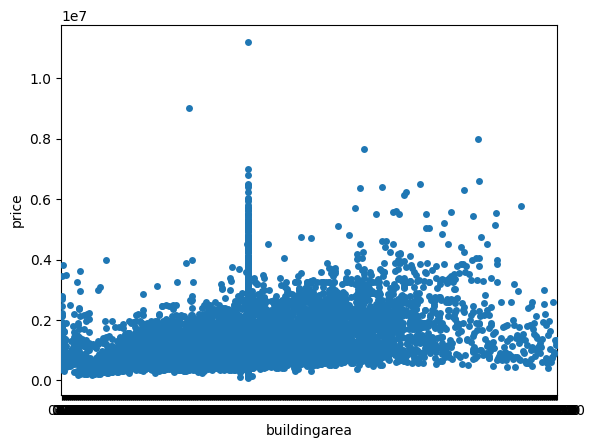

In [52]:
sns.stripplot(x='buildingarea',y='price',data=df)


Можно заметить, что цена выше для зданий малого и среднего размера

<Axes: xlabel='yearbuilt', ylabel='price'>

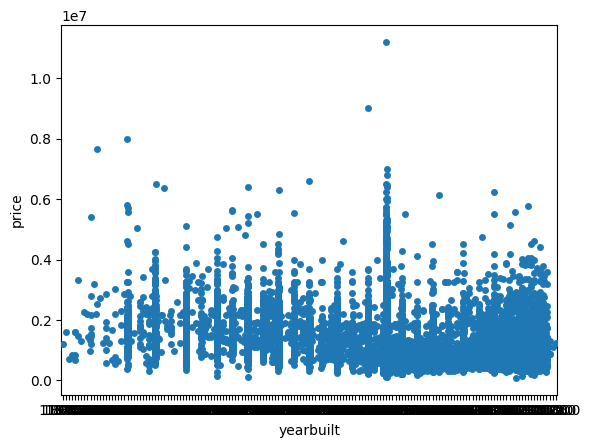

In [53]:
sns.stripplot(x='yearbuilt',y='price',data=df)


Для более новых зданий цена выше

<Axes: xlabel='price', ylabel='regionname'>

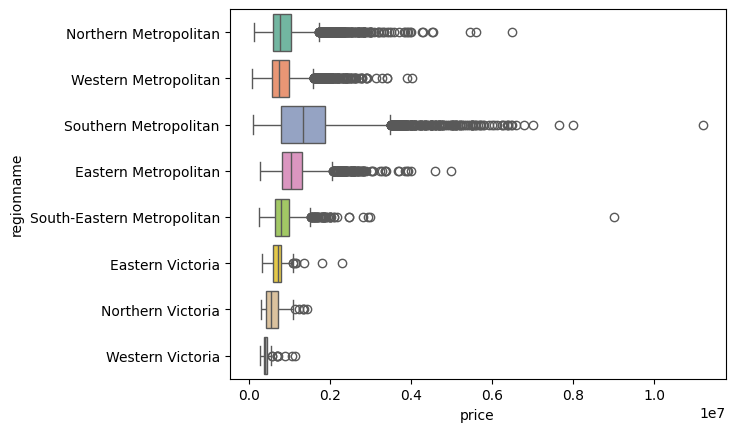

In [54]:
sns.boxplot(x= 'price', y= 'regionname', data= df, palette = 'Set2')

<Axes: xlabel='price', ylabel='councilarea'>

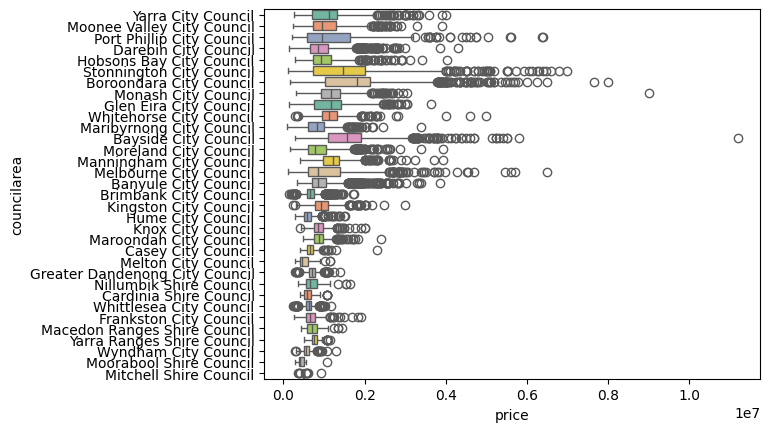

In [55]:
sns.boxplot(x= 'price', y= 'councilarea', data= df, palette = 'Set2')


<Axes: xlabel='price', ylabel='type'>

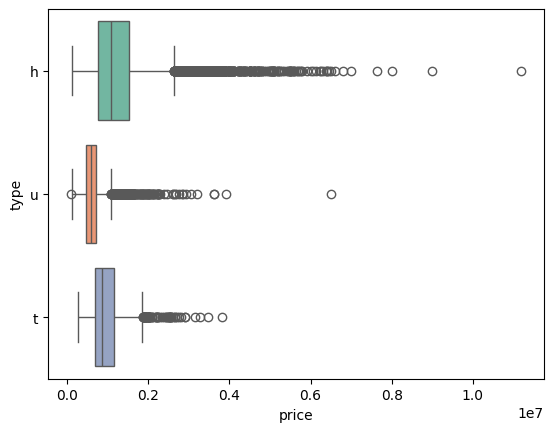

In [56]:
sns.boxplot(x= 'price', y= 'type', data= df, palette = 'Set2')


<h3>Выводы полученные в ходе анализа:</h3>

1. Цены: зависят количества комнат в доме. Цена самая высокая, если в доме 5 комнат.
2. Удаленность от центрального делового района: если расстояние от центрального делового района меньше, цена будет высокой.
3. Стоимость дома увеличивается с увеличением площади застройки.
4. Количество объектов недвижимости: цены на недвижимость в каждом районе(suburb) различаются незначительно.
5. В муниципальных районах, таких как "Порт-Филип"("Port Philip"), "Стоннингтон"("Stonnington"), "Гленейра"("GlenEira"), "Бэйсайд"("Bayside"), "Мэннингем"("Manningham"), цены выше.
6. Типы: большинство людей предпочитают дома(h), и средняя цена также высока по сравнению с двумя другими типами зданий.
7. Дома в южном мегаполисе(Southern Metropolitian) имеют более высокую цену.

<h3>Итоговый общий вывод</h3>

Цена жилья в Мельбурне зависит в первую очередь от трёх факторов:

1. Локация

2. Размер и характеристики объекта - больше комнат, ванные, площадь то выше стоимость

3. Близость к центру и престиж регионов, наиболее дорогие зоны находятся в южном и восточном направлении